# UMAP of ATAC scores and clusterings

In [2]:
import importlib
import functions
importlib.reload(functions)
functions.set_user('Pia')
data = functions.call_data_clean(p_threshold=1.3)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial import ConvexHull
import scanpy as sc
import leidenalg

ATAC_T = data['ATAC_seq_T']
ATAC_scores = data ['norm']
QC = data['QC_metrics']
scores = data['norm']



ModuleNotFoundError: No module named 'pandas'

In [116]:
ATAC_scores

,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,proB.CLP.BM,proB.FrA.BM,proB.FrBC.BM,preB.FrD.BM,B.FrE.BM,B1b.PC,...,DC.4+.Sp,DC.8+.Sp,DC.pDC.Sp,DC.103+11b+.SI,DC.103+11b-.SI,FRC.SLN,IAP.SLN,BEC.SLN,LEC.SLN,Ep.MEChi.Th
ImmGenATAC1219.peakID,,,,,,,,,,,,,,,,,,,,,
ImmGenATAC1219.peak_3,1.748461,0.137504,0.925999,0.150560,0.555816,0.137504,0.584963,1.117695,0.400538,0.189034,...,0.903038,0.622930,1.895303,0.963474,0.150560,6.008541,3.310340,1.220330,1.028569,0.150560
ImmGenATAC1219.peak_4,0.495695,0.137504,0.150560,0.150560,0.839960,0.485427,0.584963,1.691534,0.847997,0.189034,...,0.526069,1.500802,0.731183,0.150560,0.941106,3.857981,0.985500,1.189034,1.028569,0.150560
ImmGenATAC1219.peak_5,0.495695,0.137504,0.150560,0.150560,0.555816,0.422233,1.475085,1.117695,0.400538,0.678072,...,0.526069,0.137504,0.731183,1.480265,0.594549,0.941106,0.807355,1.220330,1.384050,2.459432
ImmGenATAC1219.peak_6,1.748461,1.400538,1.510962,1.367371,1.084064,0.422233,0.505891,0.176323,0.847997,0.678072,...,1.226509,0.367371,0.298658,0.918386,0.150560,0.613532,1.263034,0.925999,1.952334,3.334854
ImmGenATAC1219.peak_7,0.495695,0.137504,0.150560,0.150560,0.150560,1.226509,0.925999,1.427606,0.847997,0.678072,...,0.903038,1.550901,0.669027,0.150560,1.257011,1.839960,0.807355,1.722466,1.739848,3.587365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ImmGenATAC1219.peak_512589,0.495695,3.072106,1.510962,2.166715,2.757023,2.389567,3.039138,3.104337,3.432959,2.541019,...,2.580145,2.451541,1.937344,2.568032,2.565597,2.615887,3.340562,1.682573,2.912650,2.829850
ImmGenATAC1219.peak_512590,1.748461,3.291309,0.925999,1.655352,2.087463,1.887525,3.147307,3.351911,3.614710,3.280956,...,2.330558,2.341986,2.780310,2.669027,2.319040,3.021480,2.192194,1.863938,2.720278,2.214125
ImmGenATAC1219.peak_512591,2.424922,3.291309,2.176323,1.839960,2.381283,2.543496,2.724650,3.491853,3.867896,2.639232,...,2.266037,2.117695,2.397803,2.950468,2.707083,3.037382,2.799087,2.625270,2.912650,2.829850


In [117]:
# df for UMAP dimension reduction and clustering
scores_t = ATAC_scores.T

scores_t.index.name = 'CellType'

scores_t



ImmGenATAC1219.peakID,ImmGenATAC1219.peak_3,ImmGenATAC1219.peak_4,ImmGenATAC1219.peak_5,ImmGenATAC1219.peak_6,ImmGenATAC1219.peak_7,ImmGenATAC1219.peak_8,ImmGenATAC1219.peak_9,ImmGenATAC1219.peak_10,ImmGenATAC1219.peak_12,ImmGenATAC1219.peak_14,...,ImmGenATAC1219.peak_512584,ImmGenATAC1219.peak_512585,ImmGenATAC1219.peak_512586,ImmGenATAC1219.peak_512587,ImmGenATAC1219.peak_512588,ImmGenATAC1219.peak_512589,ImmGenATAC1219.peak_512590,ImmGenATAC1219.peak_512591,ImmGenATAC1219.peak_512592,ImmGenATAC1219.peak_512595
CellType,,,,,,,,,,,,,,,,,,,,,
LTHSC.34-.BM,1.748461,0.495695,0.495695,1.748461,0.495695,1.748461,2.424922,3.000000,1.748461,0.495695,...,1.748461,1.748461,2.424922,0.495695,0.495695,0.495695,1.748461,2.424922,0.495695,0.495695
LTHSC.34+.BM,0.137504,0.137504,0.137504,1.400538,0.137504,0.773996,0.137504,0.137504,0.137504,0.137504,...,3.072106,1.835924,3.844988,1.835924,3.493135,3.072106,3.291309,3.291309,3.072106,0.773996
STHSC.150-.BM,0.925999,0.150560,0.150560,1.510962,0.150560,0.925999,0.925999,0.150560,0.150560,0.925999,...,1.883621,1.510962,3.761285,1.883621,2.176323,1.510962,0.925999,2.176323,2.176323,0.925999
MPP4.135+.BM,0.150560,0.150560,0.150560,1.367371,0.150560,0.150560,0.150560,0.150560,0.871844,0.871844,...,2.965323,1.655352,3.628774,1.839960,1.655352,2.166715,1.655352,1.839960,2.014355,2.166715
proB.CLP.BM,0.555816,0.839960,0.555816,1.084064,0.150560,1.361768,0.505891,0.555816,1.555816,0.555816,...,4.192983,3.768714,4.397803,2.480265,1.959770,2.757023,2.087463,2.381283,2.899176,1.944858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FRC.SLN,6.008541,3.857981,0.941106,0.613532,1.839960,1.863938,0.941106,0.150560,0.189034,2.693766,...,3.061776,1.655352,3.917432,1.803227,2.636915,2.615887,3.021480,3.037382,2.849999,0.887525
IAP.SLN,3.310340,0.985500,0.807355,1.263034,0.807355,0.985500,0.584963,0.807355,0.584963,0.807355,...,3.670161,2.462052,3.485427,1.839960,2.718088,3.340562,2.192194,2.799087,3.285402,1.244887
BEC.SLN,1.220330,1.189034,1.220330,0.925999,1.722466,1.220330,1.545968,1.843984,1.883621,2.147307,...,3.944858,1.448901,3.638074,2.295723,2.063503,1.682573,1.863938,2.625270,2.969012,0.650765


In [118]:
#subset qc dataframe to add only lineage, cell family and organ information
QC_subset = QC[['CellType', 'Lineage', 'CellFamily', 'Organ']].drop_duplicates(subset='CellType', keep='first').reset_index(drop=True)

QC_subset


,CellType,Lineage,CellFamily,Organ
0,LTHSC.34-.BM,Stem&Prog,Stem&Prog Cell,Bone Marrow
1,LTHSC.34+.BM,Stem&Prog,Stem&Prog Cell,Bone Marrow
2,STHSC.150-.BM,Stem&Prog,Stem&Prog Cell,Bone Marrow
3,MPP4.135+.BM,Stem&Prog,Stem&Prog Cell,Bone Marrow
4,proB.CLP.BM,B,B Cell,Bone Marrow
...,...,...,...,...
85,FRC.CD140a+.Madcam-.CD35-.SLN,stroma,Fibroblastic reticular cell,skin draining Lymph Node
86,IAP.SLN,stroma,Pericyte,skin draining Lymph Node
87,BEC.SLN,stroma,Blood endothelial cell,skin draining Lymph Node
88,LEC.SLN,stroma,Lymphatic endothelial cell,skin draining Lymph Node


In [119]:
#merge ATAC dataframe with QC subset, drop duplicate Celltype rows from QC and reset index (combined)
ATAC_w_info = scores_t.merge(QC_subset, on='CellType', how='left').reset_index(drop=True)

#print NaN rows
ATAC_w_info[ATAC_w_info.isna().any(axis=1)]


,CellType,ImmGenATAC1219.peak_3,ImmGenATAC1219.peak_4,ImmGenATAC1219.peak_5,ImmGenATAC1219.peak_6,ImmGenATAC1219.peak_7,ImmGenATAC1219.peak_8,ImmGenATAC1219.peak_9,ImmGenATAC1219.peak_10,ImmGenATAC1219.peak_12,...,ImmGenATAC1219.peak_512587,ImmGenATAC1219.peak_512588,ImmGenATAC1219.peak_512589,ImmGenATAC1219.peak_512590,ImmGenATAC1219.peak_512591,ImmGenATAC1219.peak_512592,ImmGenATAC1219.peak_512595,Lineage,CellFamily,Organ
85,FRC.SLN,6.008541,3.857981,0.941106,0.613532,1.83996,1.863938,0.941106,0.15056,0.189034,...,1.803227,2.636915,2.615887,3.02148,3.037382,2.849999,0.887525,NaN,NaN,NaN


FRC.SLN not in QC metrics 

Cell family etc and added it in in the following step

In [120]:
# add cell family, lineage and organ for FRC.SLN cells

ATAC_w_info.at[85, 'CellFamily'] = 'Fibroblastic reticular cell'
ATAC_w_info.at[85, 'Lineage'] = 'stroma'
ATAC_w_info.at[85, 'Organ'] = 'skin draining Lymph Node'

ATAC_w_info

,CellType,ImmGenATAC1219.peak_3,ImmGenATAC1219.peak_4,ImmGenATAC1219.peak_5,ImmGenATAC1219.peak_6,ImmGenATAC1219.peak_7,ImmGenATAC1219.peak_8,ImmGenATAC1219.peak_9,ImmGenATAC1219.peak_10,ImmGenATAC1219.peak_12,...,ImmGenATAC1219.peak_512587,ImmGenATAC1219.peak_512588,ImmGenATAC1219.peak_512589,ImmGenATAC1219.peak_512590,ImmGenATAC1219.peak_512591,ImmGenATAC1219.peak_512592,ImmGenATAC1219.peak_512595,Lineage,CellFamily,Organ
0,LTHSC.34-.BM,1.748461,0.495695,0.495695,1.748461,0.495695,1.748461,2.424922,3.000000,1.748461,...,0.495695,0.495695,0.495695,1.748461,2.424922,0.495695,0.495695,Stem&Prog,Stem&Prog Cell,Bone Marrow
1,LTHSC.34+.BM,0.137504,0.137504,0.137504,1.400538,0.137504,0.773996,0.137504,0.137504,0.137504,...,1.835924,3.493135,3.072106,3.291309,3.291309,3.072106,0.773996,Stem&Prog,Stem&Prog Cell,Bone Marrow
2,STHSC.150-.BM,0.925999,0.150560,0.150560,1.510962,0.150560,0.925999,0.925999,0.150560,0.150560,...,1.883621,2.176323,1.510962,0.925999,2.176323,2.176323,0.925999,Stem&Prog,Stem&Prog Cell,Bone Marrow
3,MPP4.135+.BM,0.150560,0.150560,0.150560,1.367371,0.150560,0.150560,0.150560,0.150560,0.871844,...,1.839960,1.655352,2.166715,1.655352,1.839960,2.014355,2.166715,Stem&Prog,Stem&Prog Cell,Bone Marrow
4,proB.CLP.BM,0.555816,0.839960,0.555816,1.084064,0.150560,1.361768,0.505891,0.555816,1.555816,...,2.480265,1.959770,2.757023,2.087463,2.381283,2.899176,1.944858,B,B Cell,Bone Marrow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,FRC.SLN,6.008541,3.857981,0.941106,0.613532,1.839960,1.863938,0.941106,0.150560,0.189034,...,1.803227,2.636915,2.615887,3.021480,3.037382,2.849999,0.887525,stroma,Fibroblastic reticular cell,skin draining Lymph Node
86,IAP.SLN,3.310340,0.985500,0.807355,1.263034,0.807355,0.985500,0.584963,0.807355,0.584963,...,1.839960,2.718088,3.340562,2.192194,2.799087,3.285402,1.244887,stroma,Pericyte,skin draining Lymph Node
87,BEC.SLN,1.220330,1.189034,1.220330,0.925999,1.722466,1.220330,1.545968,1.843984,1.883621,...,2.295723,2.063503,1.682573,1.863938,2.625270,2.969012,0.650765,stroma,Blood endothelial cell,skin draining Lymph Node
88,LEC.SLN,1.028569,1.028569,1.384050,1.952334,1.739848,3.051372,1.531069,1.718088,0.150560,...,2.790772,3.153805,2.912650,2.720278,2.912650,3.192194,0.150560,stroma,Lymphatic endothelial cell,skin draining Lymph Node


## UMAP dimension reduction

In [128]:
import umap


# umap embedding
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)

# just use numeric data for UMAP
numeric_data = ATAC_w_info.select_dtypes(include=['number']).dropna()

# exclude metadata columns for embedding
umap_embedding = umap_model.fit_transform(numeric_data)  

# Create a DataFrame for the UMAP embedding
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])

#metadata columns
celltype = ATAC_w_info['CellType']
lineage = ATAC_w_info['Lineage']
cellfamily = ATAC_w_info['CellFamily']
organ = ATAC_w_info['Organ']

# Add metadata columns to the UMAP DataFrame
umap_df['CellType'] = celltype
umap_df['Lineage'] = lineage
umap_df['CellFamily'] = cellfamily
umap_df['Organ'] = organ

umap_df


/opt/miniconda3/envs/dataanalysisenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,UMAP1,UMAP2,CellType,Lineage,CellFamily,Organ
0,2.666445,-1.240880,LTHSC.34-.BM,Stem&Prog,Stem&Prog Cell,Bone Marrow
1,2.414191,-0.983665,LTHSC.34+.BM,Stem&Prog,Stem&Prog Cell,Bone Marrow
2,2.555050,-1.086432,STHSC.150-.BM,Stem&Prog,Stem&Prog Cell,Bone Marrow
3,2.506086,-0.833184,MPP4.135+.BM,Stem&Prog,Stem&Prog Cell,Bone Marrow
4,2.498278,-0.522209,proB.CLP.BM,B,B Cell,Bone Marrow
...,...,...,...,...,...,...
85,4.869728,2.952199,FRC.SLN,stroma,Fibroblastic reticular cell,skin draining Lymph Node
86,4.375197,6.477131,IAP.SLN,stroma,Pericyte,skin draining Lymph Node
87,4.788151,3.023720,BEC.SLN,stroma,Blood endothelial cell,skin draining Lymph Node
88,4.751760,2.898719,LEC.SLN,stroma,Lymphatic endothelial cell,skin draining Lymph Node


###  UMAP colored by Cell Lineage

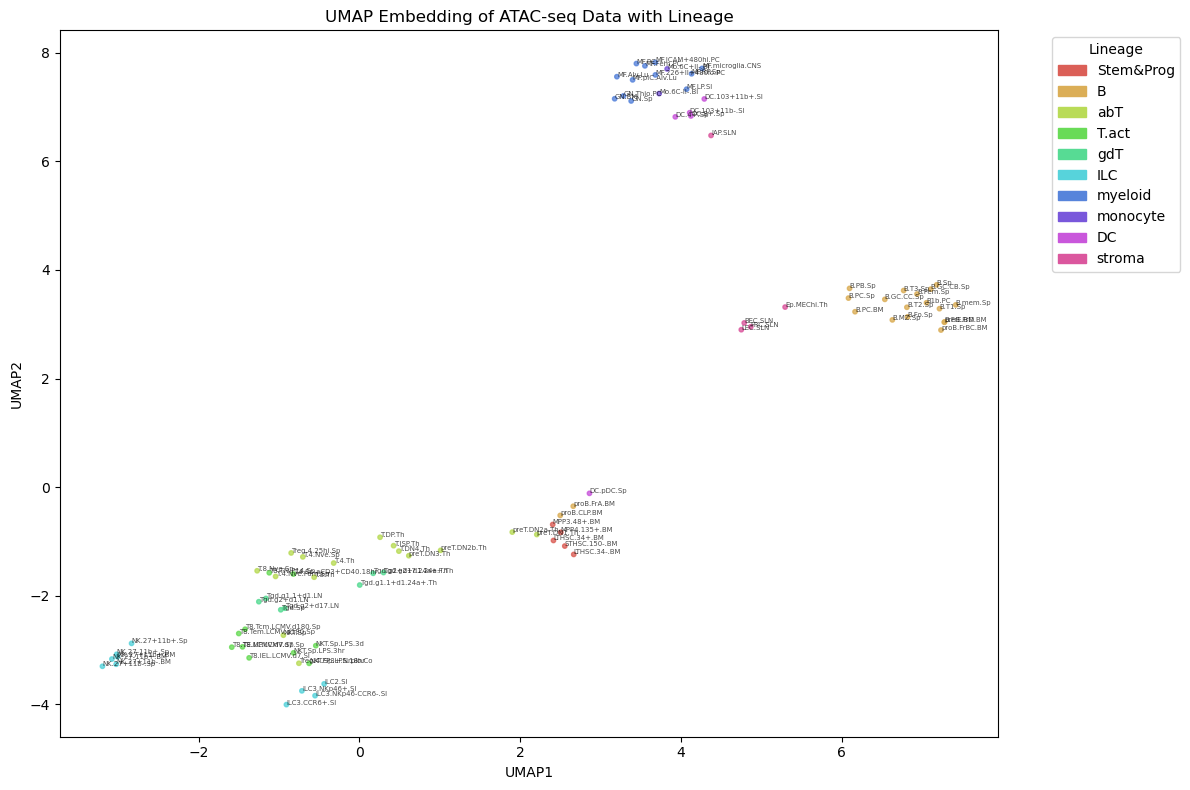

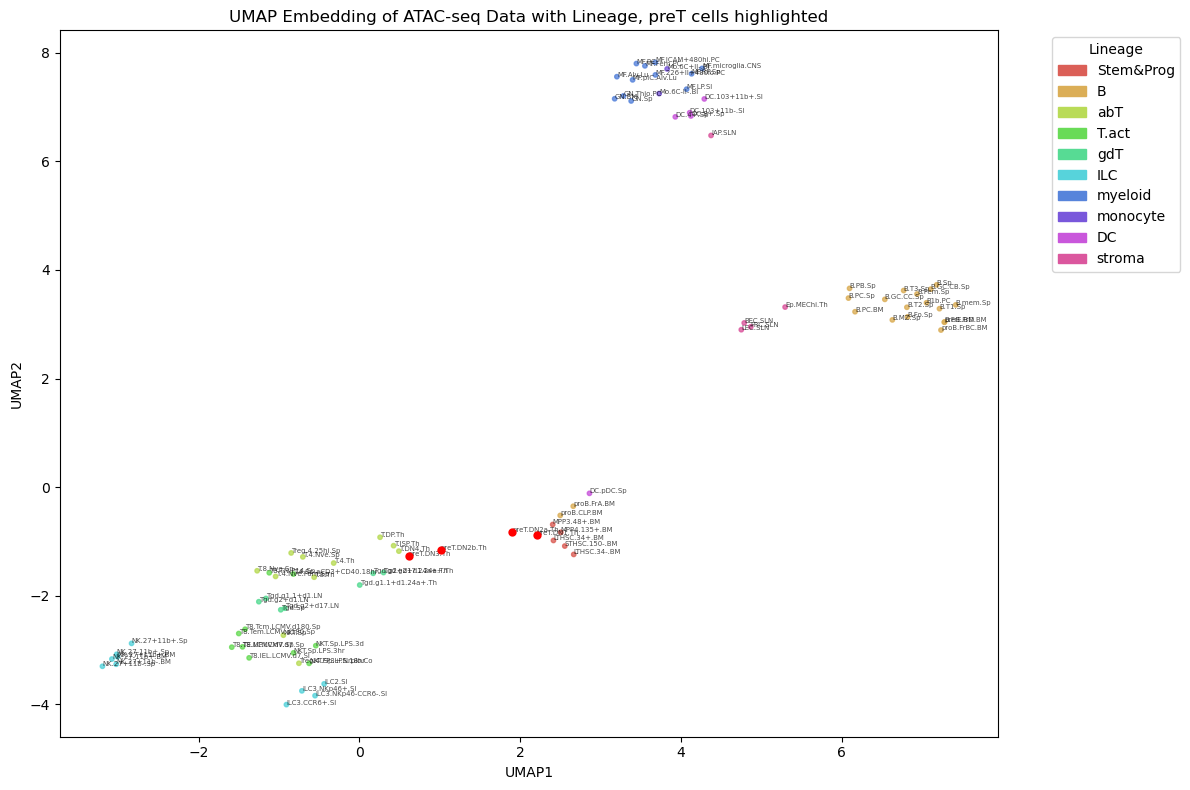

In [135]:
# Get unique lineages and assign colors
unique_lineages = umap_df['Lineage'].unique()
lin_palette = sns.color_palette("hls", len(unique_lineages))
lin_color_dict = dict(zip(unique_lineages, lin_palette))
lin_point_colors = umap_df['Lineage'].map(lin_color_dict)

# Plotting the UMAP embedding
plt.figure(figsize=(12, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=lin_point_colors, s=10 , alpha=0.8)

#Add cell type labels
for i, row in umap_df.iterrows():
    plt.text(row['UMAP1'], row['UMAP2'], str(row['CellType']), fontsize=5, alpha=0.7)

plt.title('UMAP Embedding of ATAC-seq Data with Lineage')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
lin_handles = [
    mpatches.Patch(color=lin_color_dict[lin], label=lin)
    for lin in unique_lineages
    ]
plt.legend(handles=lin_handles, title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Get unique lineages and assign colors
unique_lineages = umap_df['Lineage'].unique()
lin_palette = sns.color_palette("hls", len(unique_lineages))
lin_color_dict = dict(zip(unique_lineages, lin_palette))
lin_point_colors = umap_df['Lineage'].map(lin_color_dict)

# Define cells to highlight
preT_cells = ['preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th']
highlight_df = umap_df[umap_df['CellType'].isin(preT_cells)]

# Plotting the UMAP embedding
plt.figure(figsize=(12, 8))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=lin_point_colors, s=10 , alpha=0.8)

#Add cell type labels
for i, row in umap_df.iterrows():
    plt.text(row['UMAP1'], row['UMAP2'], str(row['CellType']), fontsize=5, alpha=0.7)

plt.title('UMAP Embedding of ATAC-seq Data with Lineage, preT cells highlighted')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
lin_handles = [
    mpatches.Patch(color=lin_color_dict[lin], label=lin)
    for lin in unique_lineages
    ]
# Overlay highlighted cells
plt.scatter(
    highlight_df['UMAP1'], highlight_df['UMAP2'],
    color='red',
    s=20,          
    linewidth=1.5,
    label='preT-Cell Differentiation',
    zorder=5
)
plt.legend(handles=lin_handles, title="Lineage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Highlighted: differentiation states of double negative pre T cells (preT.DNXy.Th). Further in differentiation => closer to differentiated T cells

### Kmeans Clustering of cell types

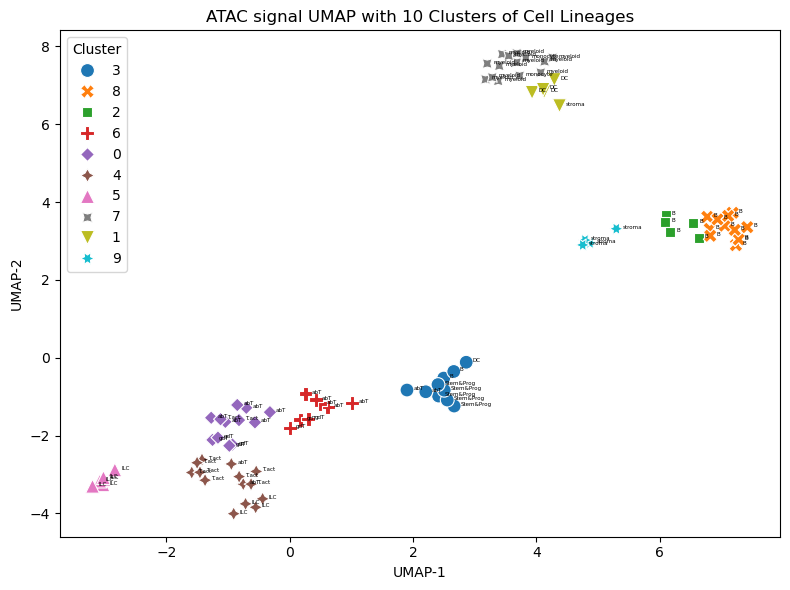

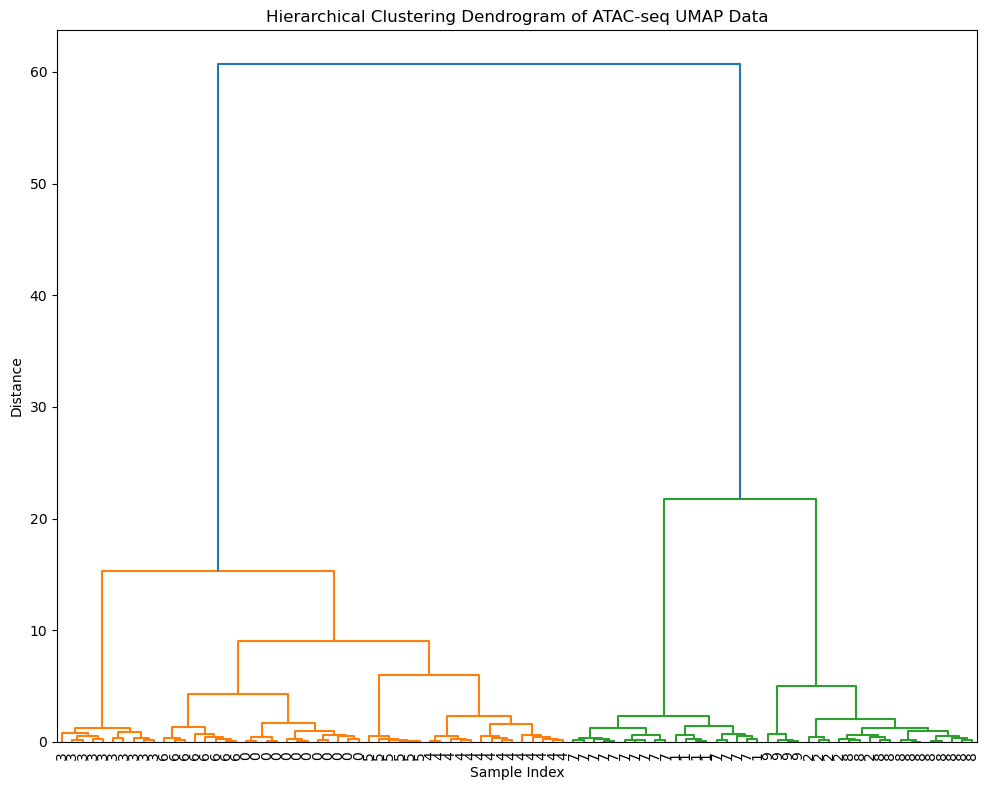

In [124]:
kmeans_df = umap_df[['UMAP1', 'UMAP2']].copy()

# kmeans with 10 clusters to compare to lineage-based grouping
kmeans10 = KMeans(n_clusters=10, random_state=42)
kmeans_df["kmeans10"] = kmeans10.fit_predict(kmeans_df).astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=kmeans_df, x="UMAP1", y="UMAP2", hue="kmeans10", style="kmeans10", s=100, palette="tab10")

for i, row in umap_df.iterrows():
    plt.text(row["UMAP1"] + 0.1, row["UMAP2"], row["Lineage"], fontsize=4)

plt.title("ATAC signal UMAP with 10 Clusters of Cell Lineages")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 8))
Z = linkage(kmeans_df[['UMAP1', 'UMAP2']], method='ward')
dendrogram(Z, labels=kmeans_df['kmeans10'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram of ATAC-seq UMAP Data")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

### Leiden Clustering of cell types

In [141]:
leiden_df = umap_df[["UMAP1", "UMAP2"]].values

# Create AnnData object of UMAP coordinates
adata = sc.AnnData(X=leiden_df)
adata.obs["CellType"] = umap_df["CellType"].values 

# Perform Leiden clustering
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.leiden(adata, resolution=1.0, key_added="leiden")

# visualize clusters
adata_df = pd.DataFrame(adata.X, columns=["UMAP1", "UMAP2"])
adata_df["leiden"] = adata.obs["leiden"].values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=adata_df, x="UMAP1", y="UMAP2", hue="leiden", palette="tab10")
plt.title("Leiden Clustering on UMAP")
plt.show()



ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.

## Correlation of clusterings and cell lineages

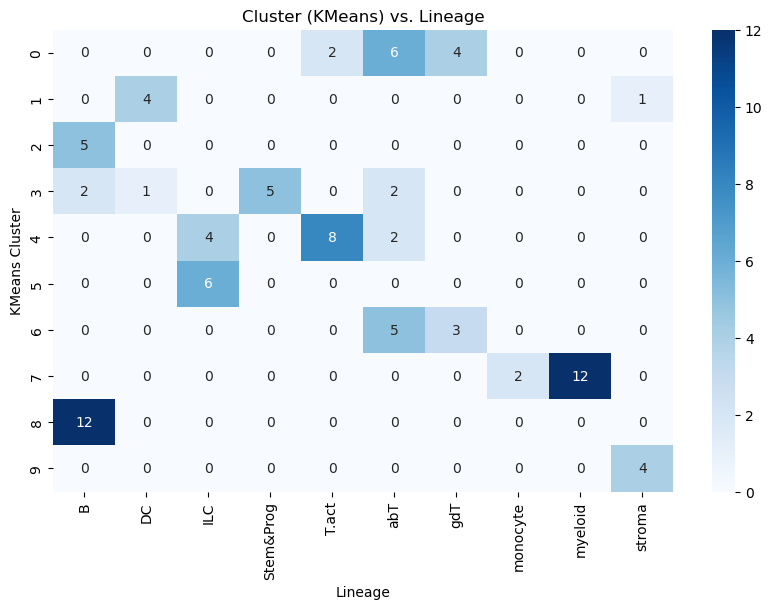

NameError: name 'adata' is not defined

In [138]:
# add clusters to umap_df
umap_df["kmeans10"] = kmeans_df["kmeans10"]

# contingency table
contingency_table = pd.crosstab(umap_df["kmeans10"], umap_df["Lineage"])

# Visualisierung als Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Cluster (KMeans) vs. Lineage")
plt.xlabel("Lineage")
plt.ylabel("KMeans Cluster")
plt.show()

# compare kmeans and leiden clusters to lineage
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(umap_df["Lineage"], umap_df["kmeans10"])
nmi = normalized_mutual_info_score(umap_df["Lineage"], umap_df["kmeans10"])

ari_leiden = adjusted_rand_score(umap_df["Lineage"], adata.obs["leiden"])
nmi_leiden = normalized_mutual_info_score(umap_df["Lineage"], adata.obs["leiden"])

print(f"ARI = {ari:.3f}")
print(f"NMI = {nmi:.3f}")